In [1]:
import sys
import skvideo.io
import skvideo.datasets

/home/misha/tensorflow/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

Using TensorFlow backend.


In [3]:
from keras.optimizers import SGD, RMSprop, Nadam
from keras.utils import np_utils, generic_utils

In [4]:
import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing

/home/misha/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


### Image specification

In [5]:
img_rows,img_cols,img_depth=120,160,15
r_state = 42
np.random.seed(r_state)
tf.set_random_seed(r_state)

### Training data

In [6]:
X_tr = [] # variable to store entire dataset

In [7]:
# this
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
frames = open(filename + '.csv', 'r')

my_frame = 0
frame_number = 0

for frame in videodata:
    
    if (frame_number >= 369 and frame_number < 766) or (frame_number >= 3492 and frame_number < 3610):
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
        X_tr.append(res_img)
#         print(frame_number)
    frame_number += 1
print(len(X_tr))

# 397 - 0, 515 - 1, 610 - 0, 

515


In [8]:
# this
filename = '/home/misha/Documents/Thesis/Dataset/race_night'
videodata = skvideo.io.vreader(filename + '.mov')
frames = open(filename + '.csv', 'r')

my_frame = 0
frame_number = 0

for frame in videodata:
    if (frame_number >= 663 and frame_number < 758) or (frame_number >= 967 and frame_number < 1038):
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
        X_tr.append(res_img)
#         print(frame_number)
    frame_number += 1
print(len(X_tr))


681


In [9]:
len(X_tr)

681

### Open files

In [ ]:
# def addFrames(dest_arr, fname, start, end):
#     for i in range(start, end + 1):
        

In [ ]:
# filename = '/home/misha/Documents/Thesis/Dataset/race_night'
# videodata = skvideo.io.vreader(filename + '.mov')
# frames = open(filename + '.csv', 'r')
# marking_data = []



# for line in frames:
#     line = line.split(',')
#     marking_data.append([int(line[0]),int(line[1]),int(line[2])])

# print(marking_data)
    
# for line in marking_data:
#     if line[2] == 1:
#         current_frame = 0
#         for frame in videodata:
#             if (current_frame >= line[0] and current_frame < line[1]):
                
#                 frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#                 res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
#                 X_tr.append(res_img)
#     #         print(frame_number)
#             current_frame += 1
# print(len(X_tr))

In [ ]:
# filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
# videodata = skvideo.io.vreader(filename + '.mov')
# frames = open(filename + '.csv', 'r')

# my_frame = 0
# frame_number = 0

# for frame in videodata:
#     if (frame_number >= 10 and frame_number < 1010):
        
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
#         X_tr.append(res_img)
# #         print(frame_number)
#     frame_number += 1
# print(len(X_tr))



# # load class 1
# filename = '/home/misha/Documents/Thesis/Dataset/race_night'
# videodata = skvideo.io.vreader(filename + '.mov')
# frames = open(filename + '.csv', 'r')

# my_frame = 0
# frame_number = 0

# for frame in videodata:
#     if (frame_number >= 10 and frame_number < 1010):
        
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
#         X_tr.append(res_img)
# #         print(frame_number)
#     frame_number += 1
# print(len(X_tr))

In [ ]:
# def addFrames(frames_list, start, end):
#     for x in range(start, end + 1):
#         cap.set(1, x)
#         ret, frame = cap.read()
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         res_img = cv2.resize(frame, (img_rows, img_cols), interpolation=cv2.INTER_AREA) # size reducing
#         frames_list.append(res_img)
    

### Reading accident class training

In [ ]:
# frames numbers hardcoded just for debug. Normally they are in .csv file.
# addFrames(X_tr, 3248, 3283)
# addFrames(X_tr, 3492, 3527)

# plt.imshow(X_tr[-1],cmap='gray')
# plt.show()


In [ ]:
# frames = open(filename + '.csv', 'r')
# ret, frame = cap.read()
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY )
# plt.imshow(img, cmap='gray')
# plt.show()
# print(img)

##### Image resize

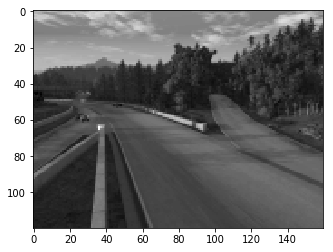

In [10]:
# now resize in reading dunction
plt.imshow(X_tr[630], cmap='gray')
plt.show()

### Reading all frames classes (takes long time)

In [11]:
# X_tr_array.shape

NameError: name 'X_tr_array' is not defined

In [15]:
# print(np.unique(X_tr_array))

[  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 25

### CNN Training parameters

In [12]:
# Importaint step
# this
X_tr_array = np.array(X_tr)
# print(X_tr_array)

In [12]:
print(X_tr_array.shape)

(681, 120, 160)


In [13]:

X_tr_array = np.expand_dims(X_tr_array, axis=4)
print(X_tr_array.shape)

(681, 120, 160, 1)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


##### Assign label to each class

In [14]:
num_samples = len(X_tr_array) # 397 - 0, 515 - 1, 610 - 0, 
# train_set = np.zeros(num_samples, 1, img_rows,img_cols,img_depth))
label = np.ones((num_samples,),dtype = int)
label[0:397] = 0
label[397:515] = 1
label[515:610] = 0
label[610:] = 1

train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

X_Train shape: (681, 120, 160, 1)


In [24]:
print(train_set.shape, X_train.shape)

(681, 120, 160, 15) (681, 120, 160, 1)


In [15]:
train_set = np.zeros((num_samples, img_rows,img_cols,img_depth))
patch_size = 15

for h in range(num_samples):
    train_set[h][:][:][:]=X_train[h,:,:,:]


In [16]:
print(train_set.shape, 'train samples')

(681, 120, 160, 15) train samples


##### CNN training parameters

In [17]:
batch_size = 5
nb_classes = 2 
nb_epoch = 10


##### convert class vectors to binary class matrices

In [18]:
Y_train = np_utils.to_categorical(y_train, nb_classes)

##### number of convolutional filters to use at each layer

In [19]:
nb_filters = [32, 32]

##### level of pooling to perform at each layer (POOL x POOL)

In [20]:
nb_pool = [2, 2]

##### Level of convolution to perform at each layer (CONV x CONV)

In [21]:
nb_conv = [3,3]

### Pre-processing

In [22]:
train_set = train_set.astype('float32')

# train_set -= np.mean(train_set)

train_set /=np.max(train_set)

In [23]:
print(img_rows, img_cols, img_depth)

120 160 15


### Define model

In [24]:
model = Sequential()
model.add(Convolution3D(16, (4, 4, 3),
input_shape=(120, 160, 15, 1), activation='relu'))

model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
model.add(Dropout(0.5))

model.add(Convolution3D(32, (3, 3, 3), activation='relu'))

model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.5))

model.add(Convolution3D(64, (3, 3, 2), activation='relu'))
model.add(Dropout(0.5))

# model.add(Convolution3D(128, (1, 1, 1), activation='relu'))

model.add(MaxPooling3D(pool_size=(2, 2, 1)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, init='normal', activation='relu'))

# model.add(Dropout(0.5))

model.add(Dense(nb_classes,init='normal'))

model.add(Activation('softmax'))

# model.optimizer.lr.assign(0.1)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Nadam')


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="normal")`


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 117, 157, 13, 16)  784       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 58, 78, 6, 16)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 58, 78, 6, 16)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 56, 76, 4, 32)     13856     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 28, 38, 2, 32)     0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 38, 2, 32)     0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 26, 36, 1, 64)     36928     
__________

In [26]:
# Split the data
X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(train_set, Y_train, test_size=0.2, random_state=4)

In [27]:
X_train_new = np.expand_dims(X_train_new, axis=4)
print(X_train_new.shape)

X_val_new = np.expand_dims(X_val_new, axis=4)
print(X_val_new.shape)

(544, 120, 160, 15, 1)
(137, 120, 160, 15, 1)


#### Training

In [28]:
hist = model.fit(X_train_new, y_train_new, validation_data=(X_val_new,y_val_new),
          batch_size=batch_size, epochs=nb_epoch, shuffle=True)

Train on 544 samples, validate on 137 samples
Epoch 1/10
544/544 [==============================] - 11s - loss: 0.7617 - acc: 0.7188 - val_loss: 0.6115 - val_acc: 0.7007
Epoch 2/10
544/544 [==============================] - 10s - loss: 0.6351 - acc: 0.7261 - val_loss: 0.5974 - val_acc: 0.7007
Epoch 3/10
544/544 [==============================] - 10s - loss: 3.9699 - acc: 0.7261 - val_loss: 4.8237 - val_acc: 0.7007
Epoch 4/10
544/544 [==============================] - 10s - loss: 4.3851 - acc: 0.7279 - val_loss: 4.8237 - val_acc: 0.7007
Epoch 5/10
544/544 [==============================] - 10s - loss: 4.3851 - acc: 0.7279 - val_loss: 4.8237 - val_acc: 0.7007
Epoch 6/10
544/544 [==============================] - 10s - loss: 4.3851 - acc: 0.7279 - val_loss: 4.8237 - val_acc: 0.7007
Epoch 7/10
544/544 [==============================] - 10s - loss: 4.3851 - acc: 0.7279 - val_loss: 4.8237 - val_acc: 0.7007
Epoch 8/10
544/544 [==============================] - 10s - loss: 4.3851 - acc: 0.7279

### Split the data

### Train the model

### Evaluate the model

In [30]:
score = model.evaluate(X_val_new, y_val_new, batch_size=batch_size)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 


125/137 [==========================>...] - ETA: 0sTest score: 4.82366380204
Test accuracy: 0.700729942126


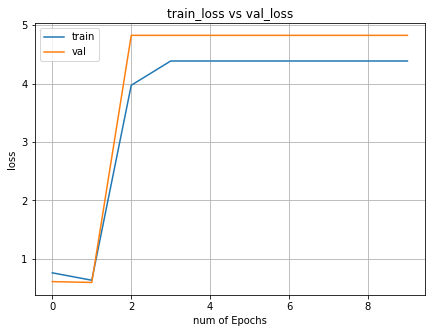

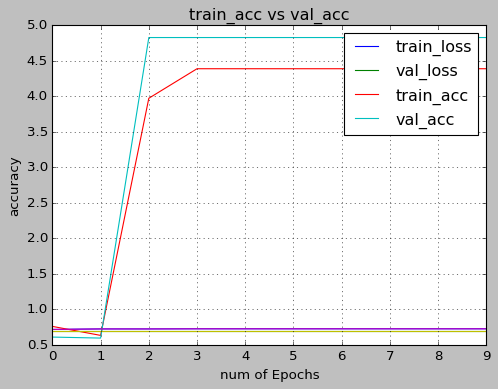

In [34]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

plt.plot(train_loss)
plt.plot(val_loss)
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('num of Epochs')
plt.grid(True)
plt.legend(['train_loss','val_loss','train_acc', 'val_acc'])

plt.show()

### Plots the result

In [33]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(10)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

['seaborn-paper', 'seaborn-white', 'seaborn-ticks', 'seaborn-muted', 'seaborn-whitegrid', 'seaborn-pastel', 'grayscale', 'seaborn', 'ggplot', 'classic', 'seaborn-deep', 'seaborn-notebook', 'seaborn-dark', 'dark_background', '_classic_test', 'seaborn-dark-palette', 'seaborn-darkgrid', 'bmh', 'seaborn-talk', 'seaborn-bright', 'seaborn-poster', 'fivethirtyeight', 'seaborn-colorblind']
